In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [9]:
df['price']

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

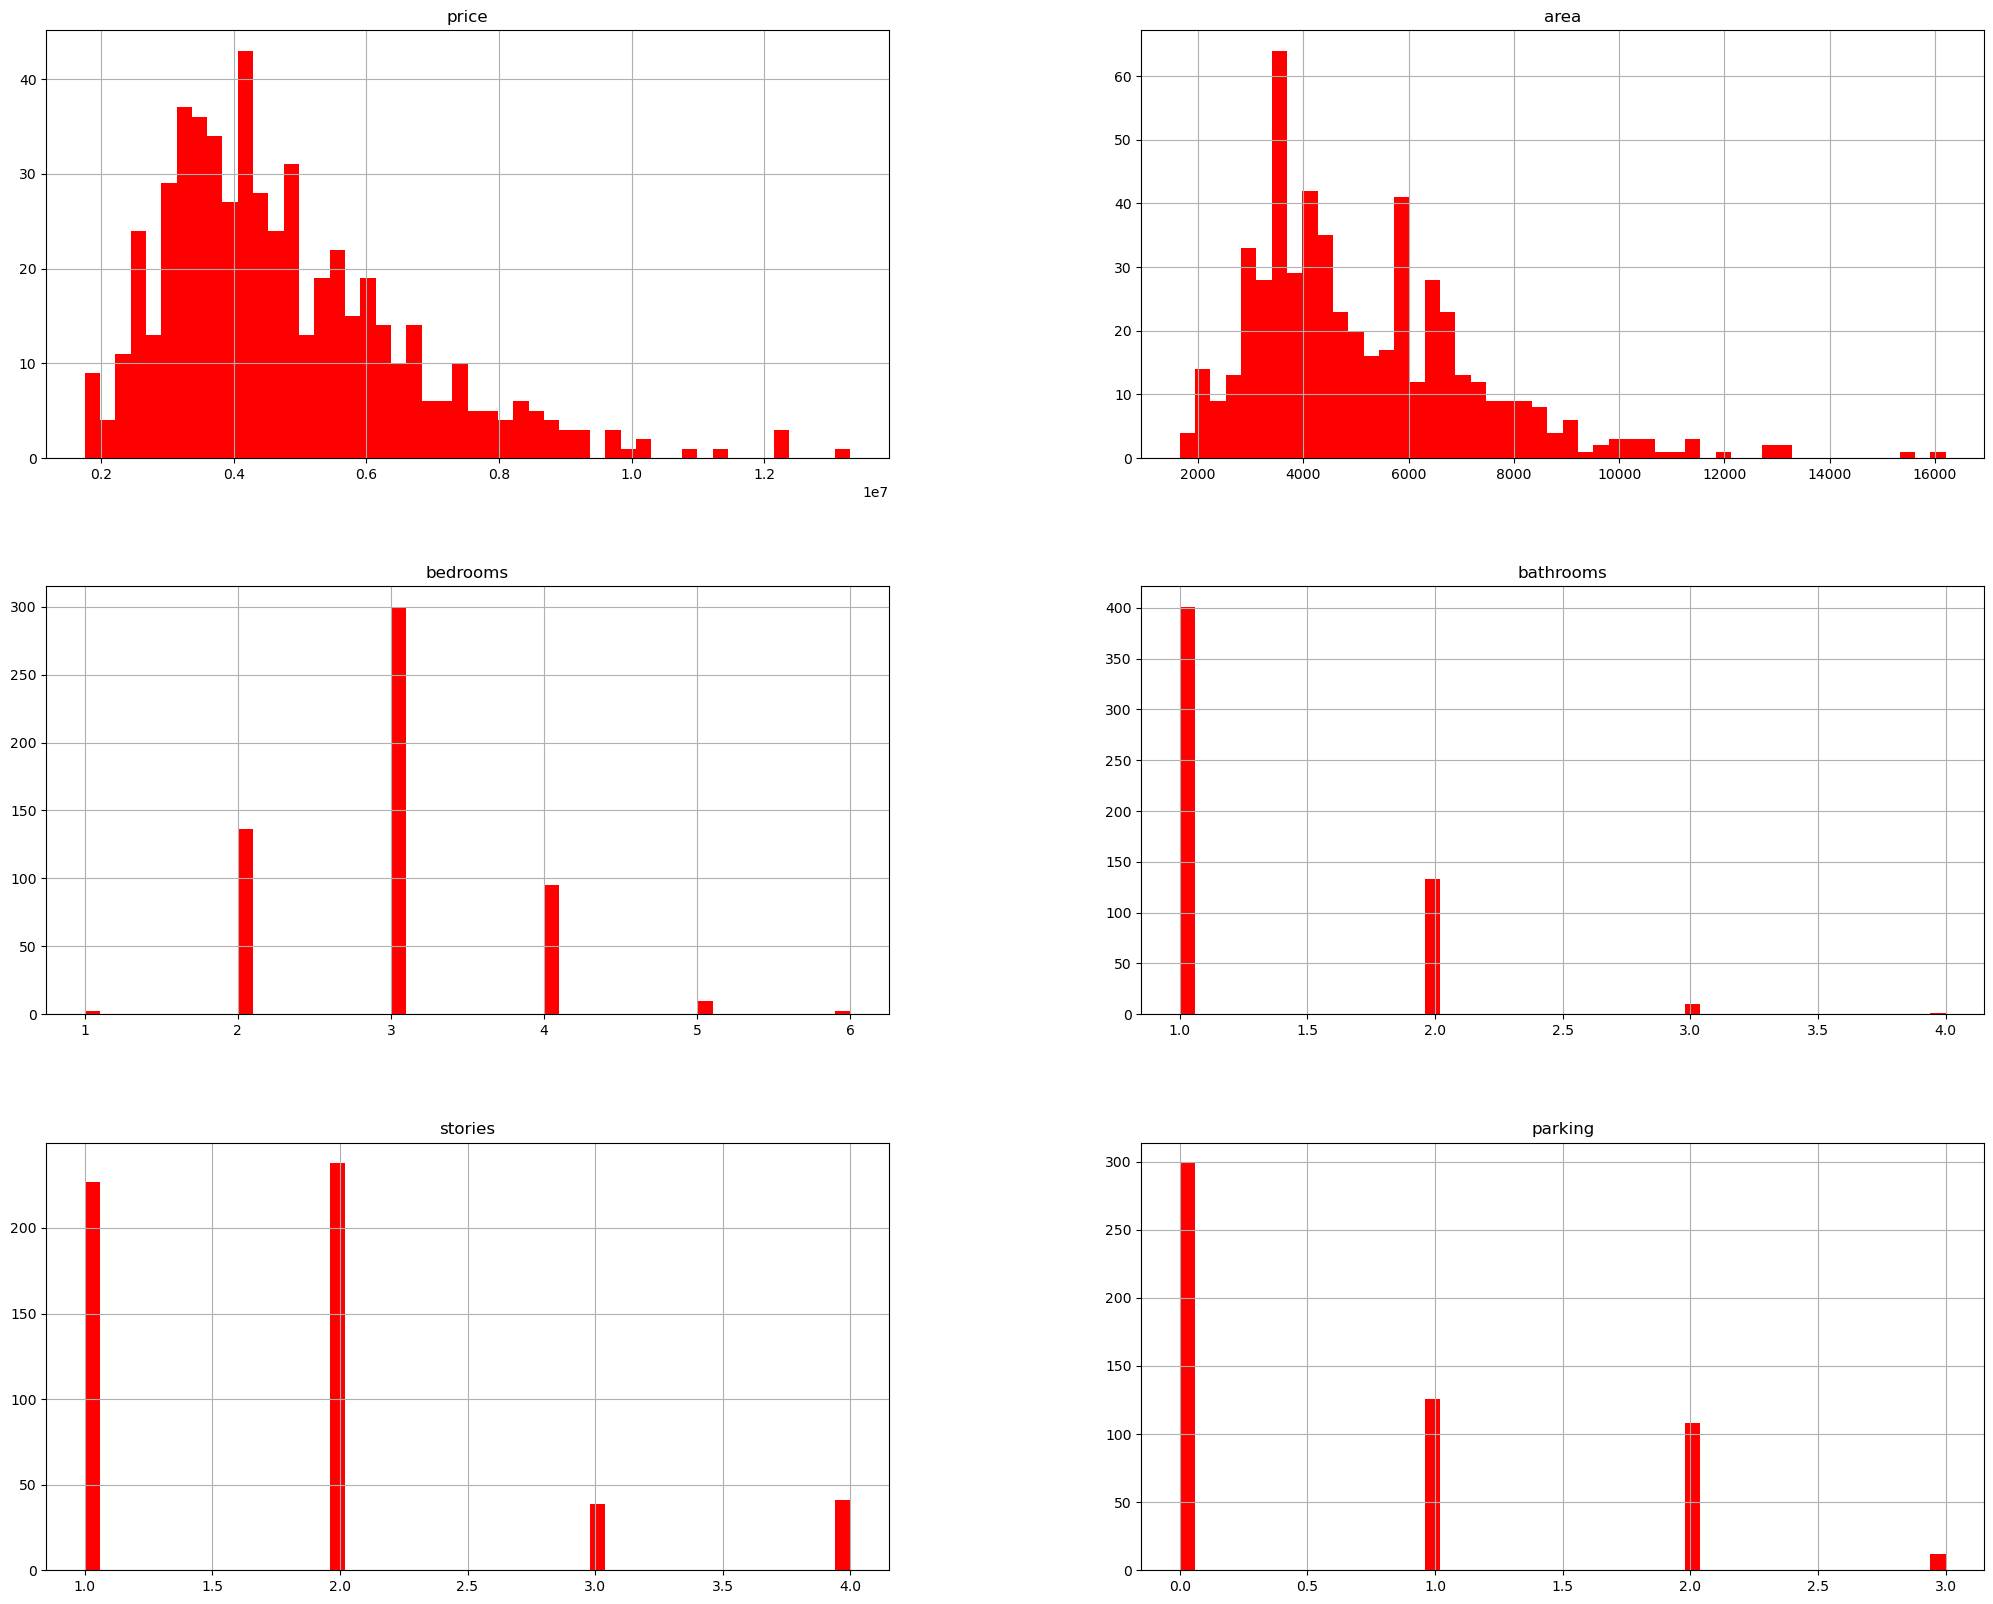

In [11]:
df.hist(bins = 50, figsize = (25,20),color ='red');

In [12]:
from sklearn.preprocessing import LabelEncoder

In [14]:
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [15]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [16]:
df.dtypes

price                  int64
area                   int64
bedrooms               int64
bathrooms              int64
stories                int64
mainroad            category
guestroom           category
basement            category
hotwaterheating     category
airconditioning     category
parking                int64
prefarea            category
furnishingstatus    category
dtype: object

In [17]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea
furnishingstatus


In [18]:
# Turn categorical variables into numbers and fill missing
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df[label] = pd.Categorical(content).codes+1

In [19]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_is_missing,guestroom_is_missing,basement_is_missing,hotwaterheating_is_missing,airconditioning_is_missing,prefarea_is_missing,furnishingstatus_is_missing
0,13300000,7420,4,2,3,2,1,1,1,2,2,2,1,False,False,False,False,False,False,False
1,12250000,8960,4,4,4,2,1,1,1,2,3,1,1,False,False,False,False,False,False,False
2,12250000,9960,3,2,2,2,1,2,1,1,2,2,2,False,False,False,False,False,False,False
3,12215000,7500,4,2,2,2,1,2,1,2,3,2,1,False,False,False,False,False,False,False
4,11410000,7420,4,1,2,2,2,2,1,2,2,1,1,False,False,False,False,False,False,False
5,10850000,7500,3,3,1,2,1,2,1,2,2,2,2,False,False,False,False,False,False,False
6,10150000,8580,4,3,4,2,1,1,1,2,2,2,2,False,False,False,False,False,False,False
7,10150000,16200,5,3,2,2,1,1,1,1,0,1,3,False,False,False,False,False,False,False
8,9870000,8100,4,1,2,2,2,2,1,2,2,2,1,False,False,False,False,False,False,False
9,9800000,5750,3,2,4,2,2,1,1,2,1,2,3,False,False,False,False,False,False,False


In [20]:
df.dtypes

price                          int64
area                           int64
bedrooms                       int64
bathrooms                      int64
stories                        int64
mainroad                        int8
guestroom                       int8
basement                        int8
hotwaterheating                 int8
airconditioning                 int8
parking                        int64
prefarea                        int8
furnishingstatus                int8
mainroad_is_missing             bool
guestroom_is_missing            bool
basement_is_missing             bool
hotwaterheating_is_missing      bool
airconditioning_is_missing      bool
prefarea_is_missing             bool
furnishingstatus_is_missing     bool
dtype: object

In [21]:
df.isnull().sum()

price                          0
area                           0
bedrooms                       0
bathrooms                      0
stories                        0
mainroad                       0
guestroom                      0
basement                       0
hotwaterheating                0
airconditioning                0
parking                        0
prefarea                       0
furnishingstatus               0
mainroad_is_missing            0
guestroom_is_missing           0
basement_is_missing            0
hotwaterheating_is_missing     0
airconditioning_is_missing     0
prefarea_is_missing            0
furnishingstatus_is_missing    0
dtype: int64

In [22]:
len(df)

545

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(df.drop("price", axis=1), df["price"])

RandomForestRegressor(n_jobs=-1, random_state=42)

In [25]:
model.score(df.drop("price", axis=1), df["price"])

0.9468641896107745

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
import numpy as np

In [28]:
model2 = LinearRegression(n_jobs=-1)
# Fit the model
model2.fit(df.drop("price", axis=1), df["price"])

LinearRegression(n_jobs=-1)

In [31]:
np.random.seed(14)
model2.score(df.drop("price", axis=1), df["price"])

0.680069137617004